In [8]:
import pandas as pd

df_benin = pd.read_csv("../data/benin-malanville.csv")
df_sierra = pd.read_csv("../data/sierraleone-bumbuna.csv")
df_togo = pd.read_csv("../data/togo-dapaong_qc.csv")


In [9]:
import os
os.listdir("../data")


['benin-malanville.csv', 'sierraleone-bumbuna.csv', 'togo-dapaong_qc.csv']

In [11]:
import pandas as pd

# Load dataset
df_benin = pd.read_csv("../data/benin-malanville.csv")

# Quick look at data
df_benin.head()
df_benin.info()
df_benin.describe()
df_benin.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [13]:
from scipy import stats
import numpy as np

# Compute Z-scores for numeric columns
numeric_cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
z_scores = np.abs(stats.zscore(df_benin[numeric_cols], nan_policy='omit'))

# Flag rows with outliers
outliers = (z_scores > 3).any(axis=1)
df_benin_clean = df_benin[~outliers].copy()

# Fill missing values (median)
df_benin_clean[numeric_cols] = df_benin_clean[numeric_cols].fillna(df_benin_clean[numeric_cols].median())


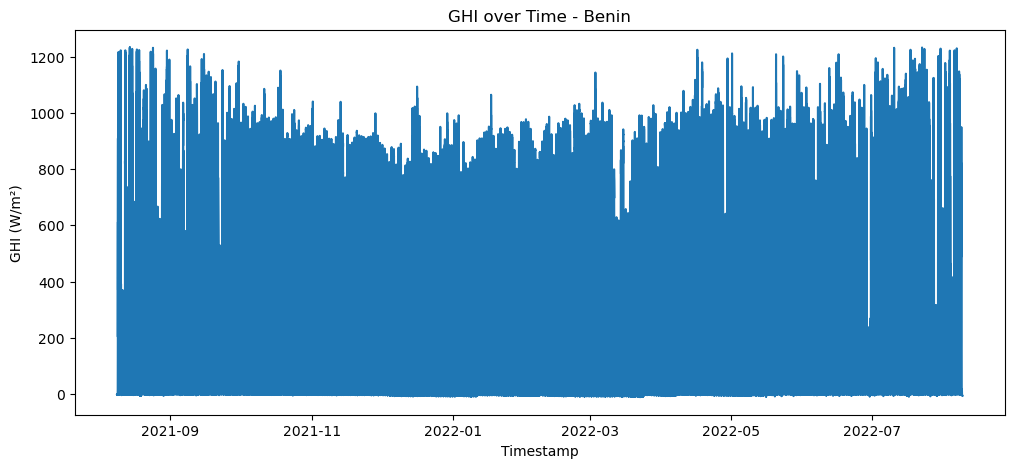

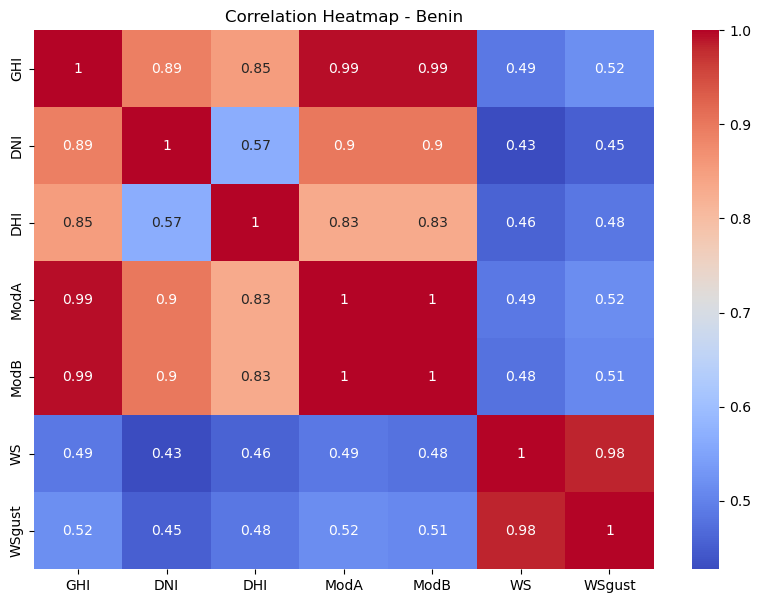

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Timestamp to datetime
df_benin_clean['Timestamp'] = pd.to_datetime(df_benin_clean['Timestamp'])

# Plot GHI over time
plt.figure(figsize=(12,5))
plt.plot(df_benin_clean['Timestamp'], df_benin_clean['GHI'])
plt.title('GHI over Time - Benin')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.show()

# Heatmap of correlations
plt.figure(figsize=(10,7))
sns.heatmap(df_benin_clean[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Benin')
plt.show()


In [15]:
df_cleaning = df_benin_clean.groupby('Cleaning')[['ModA','ModB']].mean()
print(df_cleaning)


                ModA       ModB
Cleaning                       
0         232.323881  224.95509
1         306.610124  301.45000


In [17]:
df_benin_clean.to_csv("../data/benin_clean.csv", index=False)
